# Business Understanding: This initial phase involves understanding the project's objectives, requirements, and constraints from a business perspective. Stakeholders and domain experts collaborate to define the problem, establish project goals, and identify relevant success criteria.

Output:

Tema: Analiza, evaluarea si prognozarea preturilor apartementelor in Republica Moldova

Slide: Analiza și prognoza prețurilor apartamentelor în Republica Moldova

Descriere:

- Acest slide prezintă o abordare generală pentru analiza, evaluarea și prognozarea prețurilor apartamentelor în Republica Moldova. Procesul constă în trei etape esențiale:

- Colectarea datelor istorice: Se adună informații despre prețurile apartamentelor din ultimii ani, incluzând prețurile medii și variațiile pe tipuri de apartamente, zone geografice și caracteristici relevante.

- Identificarea factorilor cheie: Se examinează factorii care influențează prețurile apartamentelor, precum cererea și oferta de locuințe, dezvoltarea infrastructurii, stabilitatea economică și politică, politici guvernamentale, demografia și migrația populației, precum și accesul la finanțare și dobânzile creditelor ipotecare.

- Analiza tendințelor: Se evaluează tendințele observate în prețurile apartamentelor și se analizează relația dintre acestea și factorii identificați anterior.


# Data Understanding: In this phase, the focus shifts to the data. Analysts and data scientists examine the available data sources, collect initial datasets, and familiarize themselves with the data. They also identify data quality issues, such as missing, inconsistent, or erroneous values, and assess the data's relevance to the project's objectives.

Slide: Înțelegerea și colectarea datelor pentru analiza prețurilor apartamentelor

Descriere:

Faza de înțelegere a datelor:

1. Colectarea datelor: Se examinează sursele de date disponibile și se colectează seturi de date inițiale. În cazul nostru, se folosește parsarea site-ului de anunțuri 999 pentru colectarea datelor.

2. Pre-procesarea datelor: Se familiarizează cu datele și se identifică probleme de calitate a datelor, precum valorile lipsă, inconstante sau eronate.

    - Un script Golang a fost creat pentru a parsa periodic platforma 999.
    - După obținerea datelor în format brut, datele numerice sunt extrase din blocuri de text.
    - Anumite categorii de apartamente/anunțuri sunt excluse, de exemplu, cele pentru chirie.
    - Aceasta reprezintă etapa primară de transformare și normalizare a datelor.
3. Obținerea coordonatelor geografice: Se utilizează OpenStreetMap API pentru a obține coordonatele geografice ale apartamentelor în funcție de adresele lor.

4. Tot o data la aceasta etap vom utiliza un heat map pentru a vizuliza datele pe harta, aceasta ne va oferi on itlegere mai buna a datelor colectate.
   Aceasta vizulizare ne va oferi pozibilitatea de analiza cele mai solicitate zone sau zone cu pontential mare de dezvolate, precum zone noi de contructii.

In [221]:
import pandas as pd
import geopandas as geopandas

# Importing dataset:

df = pd.read_json('preprocessed.json')

df.head()


,ID,Title,Price,UpdatedAt,Type,Region,Author,AuthorProfile,Description,HousingType,TotalArea,Condition,NrRooms,Balcony,Floor,NumberOfFloors,Lon,Lat
0,82269463,"Apartament cu 2 camere, 80 m², Botanica, Chișinău",99900,2023-04-30T19:05:00Z,Tipul: Vând,"Moldova, Chișinău mun., Chișinău, Botanica,...","topestate-botanica 2,8",https://999.md/ro/profile/topestate-botanica,,Construcţii noi,80,Euroreparație,2,1,16,17,28.843789,46.986127
1,78509490,"Apartament cu 3 camere, 99 m², Centru, Chișinău",159900,2023-04-30T13:27:00Z,Tipul: Vând,"Moldova, Chișinău mun., Chișinău, Centru, ...",Connect6565,https://999.md/ro/profile/Connect6565,,Construcţii noi,99,Euroreparație,3,1,7,8,28.850124,47.020729
2,80854492,"O cameră, 17 m², Botanica, Chișinău",7900,2023-05-01T11:00:00Z,Tipul: Vând,"Moldova, Chișinău mun., Chișinău, Botanica,...",MAX-202,https://999.md/ro/profile/MAX-202,,Secundar,17,Reparație cosmetică,0,1,5,5,28.949794,46.936900
3,82058441,"Apartament cu 3 camere, 84 m², Durlești, Chișinău",65000,2023-05-01T11:15:00Z,Tipul: Vând,"Moldova, Chișinău mun., Chișinău, Durlești,...",acces219,https://999.md/ro/profile/acces219,,Construcţii noi,84,La alb,3,1,7,8,28.760488,47.011068
4,81788666,"Apartament cu 2 camere, 67 m², Ciocana, Chișinău",72999,2023-04-27T10:26:00Z,Tipul: Vând,"Moldova, Chișinău mun., Chișinău, Ciocana, ...",Lumeamd-Evelina,https://999.md/ro/profile/Lumeamd-Evelina,,Construcţii noi,67,Euroreparație,2,2,2,9,28.894026,47.037872


In [222]:
# Transform coordinates to geopandas
geometry = geopandas.points_from_xy(df.Lat, df.Lon)
geo_df = geopandas.GeoDataFrame(
    df[["Title", "Price", "Lon", "Lat"]], geometry=geometry
)

geo_df.head()

,Title,Price,Lon,Lat,geometry
0,"Apartament cu 2 camere, 80 m², Botanica, Chișinău",99900,28.843789,46.986127,POINT (46.98613 28.84379)
1,"Apartament cu 3 camere, 99 m², Centru, Chișinău",159900,28.850124,47.020729,POINT (47.02073 28.85012)
2,"O cameră, 17 m², Botanica, Chișinău",7900,28.949794,46.936900,POINT (46.93690 28.94979)
3,"Apartament cu 3 camere, 84 m², Durlești, Chișinău",65000,28.760488,47.011068,POINT (47.01107 28.76049)
4,"Apartament cu 2 camere, 67 m², Ciocana, Chișinău",72999,28.894026,47.037872,POINT (47.03787 28.89403)


In [223]:

from folium import plugins, folium
from branca.utilities import split_six

map = folium.Map(location=[47.036953, 28.833097, ], tiles="OpenStreetMap", zoom_start=7)

heat_data = [[point.xy[0][0], point.xy[1][0]] for point in geo_df.geometry]
print(heat_data[0])
plugins.HeatMap(heat_data, radius=12).add_to(map)

map

[46.986127, 28.8437895]


# Data Preparation: This phase involves cleaning, transforming, and integrating the data to create a final dataset suitable for analysis. This may include handling missing or erroneous data, normalizing or scaling variables, and combining data from different sources. Feature engineering—creating new variables or features from existing data—is also a common activity in this phase.

La aceasta etapa utilizam rezultatele etapei anteriore, generata de scriptul Golang. Unde avem date categoriale si neformatate. La aceasta etapa vom folosi diverse tehnice de inteficare a detelor categoriale si crearea noilor features, utilizand tehnici precum on-hot encoding

1. Curățarea datelor implică identificarea și corectarea oricăror erori sau inconsistențe din date, cum ar fi valori lipsă, înregistrări duplicate sau tipuri de date incorecte. Aceasta este o etapă importantă deoarece ajută la asigurarea faptului că datele sunt complete și precise, ceea ce este necesar pentru construirea de modele fiabile.

În primul rând, toate coloanele care nu sunt susceptibile să ajute la prezicerea variabilei țintă sunt eliminate din cadrul datelor.

In [224]:
df.drop(columns=['Title',
                 'Region',
                 'Author',
                 'AuthorProfile',
                 'Description',
                 'UpdatedAt',
                 'Lon',
                 'Type',
                 'ID',
                 'Lat'], axis=1, inplace=True)

df = df[df['Price'] <=200000]
df = df[df['Price'] >=30000]
df = df[df['NrRooms'] !=0]


2. Prelucrarea datelor
Acum, categorisim caracteristicile în funcție de tipul lor de date (int, float, obiect) și apoi calculăm numărul lor.

In [225]:

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 2
Integer variables: 6
Float variables: 0


3. Analiza exploratorie a datelor
EDA se referă la analiza profundă a datelor pentru a descoperi diferite modele și pentru a identifica anomalii. Înainte de a trage concluzii din date, este esențial să examinați toate variabilele.

Așadar, aici să facem o hartă de căldură folosind biblioteca Seaborn.


<Axes: >

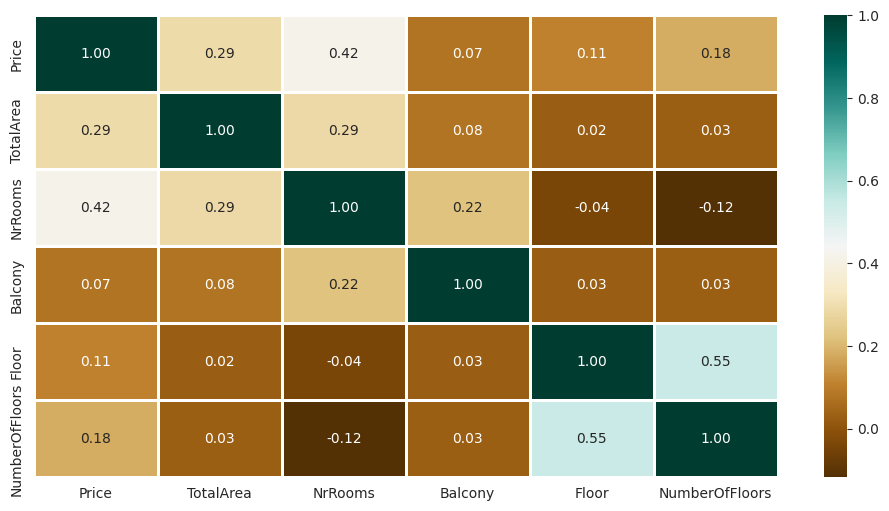

In [226]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

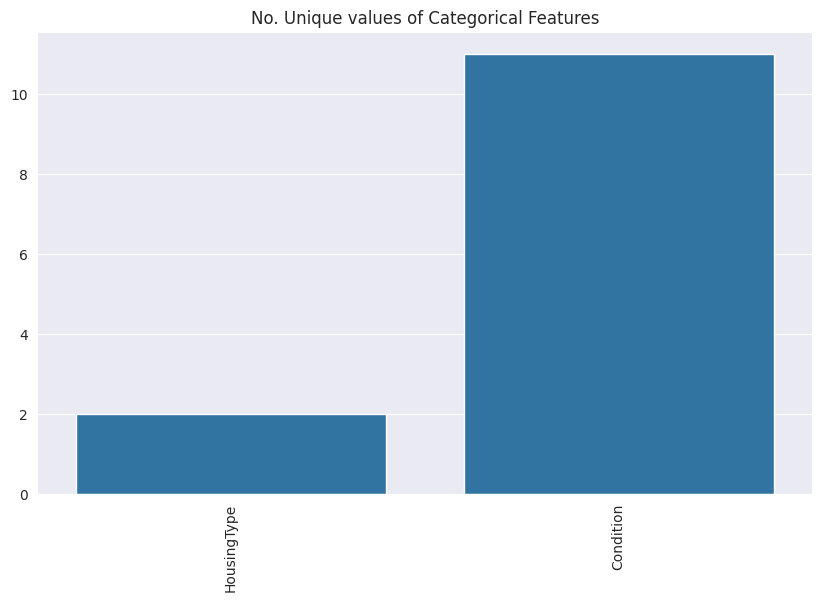

In [227]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

4. OneHotEncoder - pentru etichetarea caracteristicilor categorice
OneHot Encoding este cea mai bună modalitate de a converti datele categorice în vectori binari. Acesta mapează valorile la valori întregi. Prin utilizarea OneHotEncoder, putem converti ușor datele de tip obiect în int. Pentru asta, în primul rând, trebuie să colectăm toate caracteristicile care au tipul de date obiect. Pentru a face acest lucru, vom face un loop.

In [228]:
from sklearn.preprocessing import OneHotEncoder

s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = [name.replace(' ', '_') for name in OH_encoder.get_feature_names_out()]
df_final = df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


Categorical variables:
['HousingType', 'Condition']
No. of. categorical features:  2


3 .Acum să trecem la partea de EDA. Începem procesul nostru de EDA prin eliminarea tuturor valorilor nule din setul nostru de date. Putem face acest lucru în Python folosind funcția „dropna”.

In [229]:
from termcolor import colored as cl  # text customization

# df_final.dropna(inplace=True)

print(cl(df_final.isnull().sum(), attrs=['bold']))

Price                                0
TotalArea                            0
NrRooms                              0
Balcony                              0
Floor                                0
NumberOfFloors                       0
HousingType_Construcţii_noi          0
HousingType_Secundar                 0
Condition_                           0
Condition_Are_nevoie_de_reparație    0
Condition_Casă_pentru_demolare       0
Condition_Construcție_nefinisată     0
Condition_Dat_în_exploatare          0
Condition_Design_individual          0
Condition_Euroreparație              0
Condition_Fără_reparație             0
Condition_La_alb                     0
Condition_La_gri                     0
Condition_Reparație_cosmetică        0
dtype: int64


3. Acum, folosind funcția „describe”, putem obține o vedere statistică a datelor, cum ar fi media, mediana, deviația standard, și așa mai departe.

In [230]:
df_final.describe()


,Price,TotalArea,NrRooms,Balcony,Floor,NumberOfFloors,HousingType_Construcţii_noi,HousingType_Secundar,Condition_,Condition_Are_nevoie_de_reparație,Condition_Casă_pentru_demolare,Condition_Construcție_nefinisată,Condition_Dat_în_exploatare,Condition_Design_individual,Condition_Euroreparație,Condition_Fără_reparație,Condition_La_alb,Condition_La_gri,Condition_Reparație_cosmetică
count,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000
mean,71496.700943,67.925346,2.141950,1.200566,5.254780,9.386226,0.669497,0.330503,0.000063,0.021698,0.000063,0.010629,0.004843,0.036604,0.416855,0.013836,0.351698,0.005031,0.138679
std,30723.936868,57.010065,0.803266,0.596201,3.443842,3.708743,0.470409,0.470409,0.007931,0.145701,0.007931,0.102551,0.069423,0.187793,0.493054,0.116816,0.477515,0.070756,0.345622
min,30000.000000,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49500.000000,50.000000,2.000000,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64900.000000,65.000000,2.000000,1.000000,5.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,85900.000000,78.000000,3.000000,1.000000,7.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,200000.000000,6485.000000,5.000000,3.000000,21.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Vizulizam datele finale:

<Axes: >

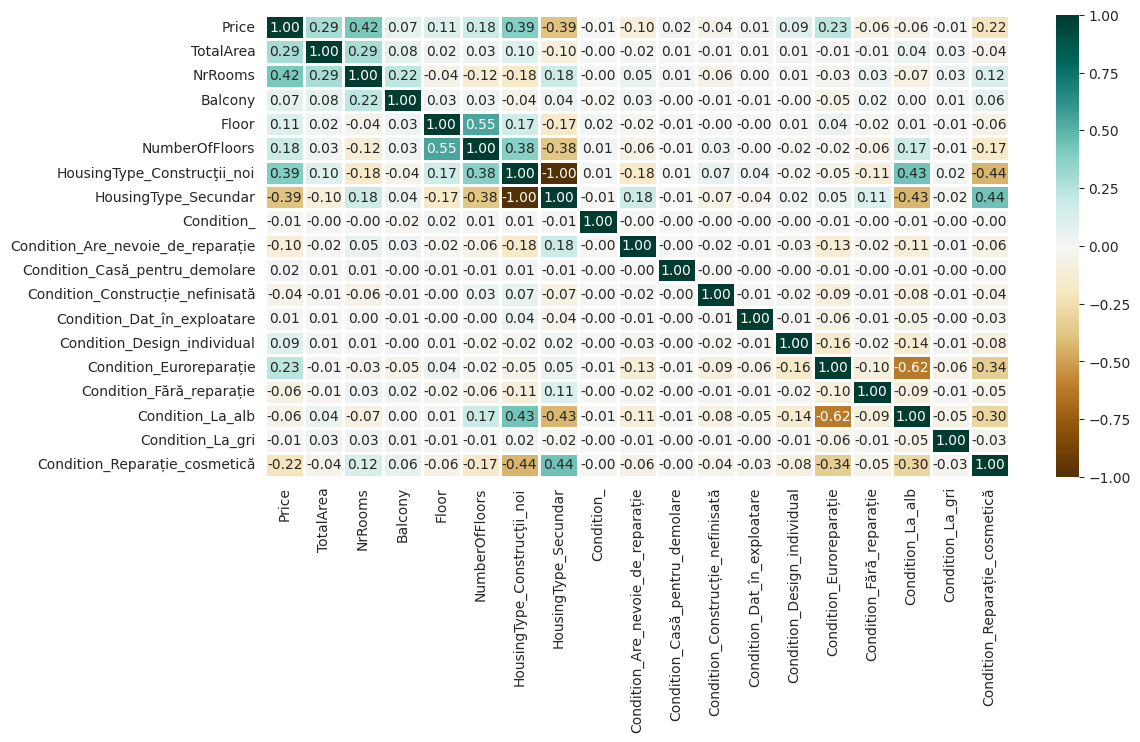

In [231]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df_final.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

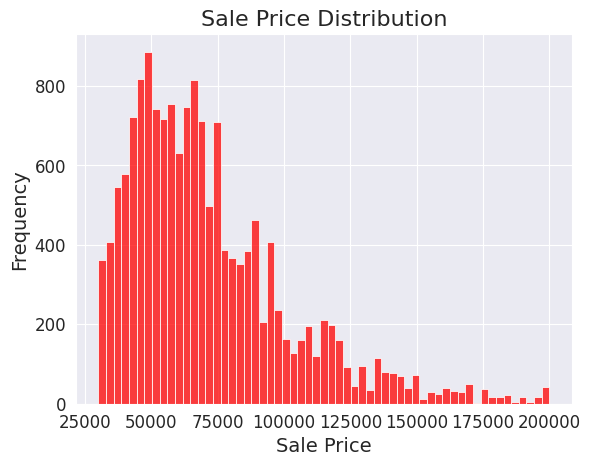

In [232]:
# Distribution plot

sns.histplot(df_final['Price'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [233]:


# Assuming df is your DataFrame
# Replace 'Condition_' with the actual column name you want to delete
column_name = 'Condition_'
print(df_final.columns)

# Check if the column exists in the DataFrame before deleting it
if column_name in df_final.columns:
    df_final = df_final.drop(column_name, axis=1)
else:
    print(f"Column '{column_name}' does not exist in the DataFrame.")

df_final.head(5)


Index(['Price', 'TotalArea', 'NrRooms', 'Balcony', 'Floor', 'NumberOfFloors',
       'HousingType_Construcţii_noi', 'HousingType_Secundar', 'Condition_',
       'Condition_Are_nevoie_de_reparație', 'Condition_Casă_pentru_demolare',
       'Condition_Construcție_nefinisată', 'Condition_Dat_în_exploatare',
       'Condition_Design_individual', 'Condition_Euroreparație',
       'Condition_Fără_reparație', 'Condition_La_alb', 'Condition_La_gri',
       'Condition_Reparație_cosmetică'],
      dtype='object')


,Price,TotalArea,NrRooms,Balcony,Floor,NumberOfFloors,HousingType_Construcţii_noi,HousingType_Secundar,Condition_Are_nevoie_de_reparație,Condition_Casă_pentru_demolare,Condition_Construcție_nefinisată,Condition_Dat_în_exploatare,Condition_Design_individual,Condition_Euroreparație,Condition_Fără_reparație,Condition_La_alb,Condition_La_gri,Condition_Reparație_cosmetică
0,99900,80,2,1,16,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,159900,99,3,1,7,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,65000,84,3,1,7,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,72999,67,2,2,2,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,39500,44,1,1,6,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Modeling: In the modeling phase, data scientists apply various algorithms and techniques to build models that can identify patterns or make predictions. This may involve selecting appropriate algorithms, tuning model parameters, and using techniques like cross-validation to avoid overfitting. The goal is to create one or more models that best meet the project's objectives.

Splitting Dataset into Training and Testing
X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [234]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


# FEATURE SELECTION & DATA SPLIT

X_var = df_final[['TotalArea', 'NrRooms', 'Balcony', 'Floor', 'NumberOfFloors', 'HousingType_Construcţii_noi', 'HousingType_Secundar', 'Condition_Are_nevoie_de_reparație', 'Condition_Construcție_nefinisată', 'Condition_Dat_în_exploatare', 'Condition_Design_individual', 'Condition_Euroreparație', 'Condition_Fără_reparație', 'Condition_La_alb', 'Condition_Reparație_cosmetică']].values
y_var = df_final['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[61.  2.  1.  4.  8.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [60.  3.  2.  3.  9.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.]
 [44.  2.  2.  5.  5.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.]
 [64.  2.  1.  9. 12.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [69.  2.  2.  9. 10.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]
X_test samples :  [[35.  1.  1.  9. 10.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.]
 [75.  3.  1.  6.  9.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [71.  2.  2.  6. 10.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [95.  4.  2.  5.  5.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.]
 [56.  2.  1.  5.  9.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.]]
y_train samples :  [103000  59500  43000  51500  67000]
y_test samples :  [ 52500  99000 112900  40000  54900]


In [235]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [236]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

# Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 30, 15, 5]}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

# Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.05, 0.01]}
grid_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'n_estimators': [50, 100, 200]})

In [237]:
# Prediction
y_pred_rf = grid_rf.predict(X_test)
y_pred_gb = grid_gb.predict(X_test)

In [238]:
# EVALUATION
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))

print('-------------------------------------------------------------------------------')

print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))

print('-------------------------------------------------------------------------------')

print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))

print('-------------------------------------------------------------------------------')

print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))

print('-------------------------------------------------------------------------------')

print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))

print('-------------------------------------------------------------------------------')

print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))

print('-------------------------------------------------------------------------------')

# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))

print('-------------------------------------------------------------------------------')

print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))

print('-------------------------------------------------------------------------------')

print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))

print('-------------------------------------------------------------------------------')

print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))

print('-------------------------------------------------------------------------------')

print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))

print('-------------------------------------------------------------------------------')

print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))

print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.5303255948360035
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.5303271022230989
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.5303255818892691
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.5303570292107695
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.5304272153807593
-------------------------------------------------------------------------------
R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.5301853448624787
------------------------------------------------

In [239]:
print('Random Forest R2 score: ', r2(y_test, y_pred_rf))
print('Gradient Boosting R2 score: ', r2(y_test, y_pred_gb))

Random Forest R2 score:  0.7466406044840161
Gradient Boosting R2 score:  0.7275372828232504
